### train.csv - 학습용 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수
- 등록차량수
﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿

### test.csv - 테스트 데이터

- 단지코드
- 총세대수
- 임대건물구분
- 지역
- 공급유형
- 전용면적
- 전용면적별세대수
- 공가수
- 신분
- 임대료보증금
- 임대료
- 도보 10분거리 내 지하철역 수(환승노선 수 반영)
- 도보 10분거리 내 버스정류장 수
- 단지내주차면수


### age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포

지역
10대미만(여자)
10대미만(남자)
20대(여자)
20대(남자)
30대(여자)
30대(남자)
40대(여자)
40대(남자)
50대(여자)
50대(남자)
60대(여자)
60대(남자)
70대(여자)
70대(남자)
80대(여자)
80대(남자)
90대(여자)
90대(남자)
100대(여자)
100대(남자)


### sample_submission.csv - 제출 양식

- code : 단지 코드
- num : 등록차량수


## 패키지

In [1]:
# pip install lightgbm

In [2]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

from tqdm import tqdm

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


## 데이터

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')
age_gender= pd.read_csv('./data/age_gender_info.csv')

In [4]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [5]:
age_gender

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,...,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


- age_gender_info.csv의 분포는 train, test 데이터에만 해당하는 인구 분포입니다.
- age_gender_info.csv는 해당 단지들에 살고있는 모든 인구의 분포입니다.

In [6]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [7]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


- 공가수 : 비어있는 집

In [8]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


## EDA

### 결측치 확인

In [9]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [10]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [11]:
age_gender.isna().sum()

지역           0
10대미만(여자)    0
10대미만(남자)    0
10대(여자)      0
10대(남자)      0
20대(여자)      0
20대(남자)      0
30대(여자)      0
30대(남자)      0
40대(여자)      0
40대(남자)      0
50대(여자)      0
50대(남자)      0
60대(여자)      0
60대(남자)      0
70대(여자)      0
70대(남자)      0
80대(여자)      0
80대(남자)      0
90대(여자)      0
90대(남자)      0
100대(여자)     0
100대(남자)     0
dtype: int64

In [12]:
# 임대보증금과 임대료는 '-'을 null로 바꾼 후 float로 타입 변경
train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
train['임대보증금'] = train['임대보증금'].astype(float)
test['임대보증금'] = test['임대보증금'].astype(float)

train.loc[train.임대료=='-', '임대료'] = np.nan
test.loc[test.임대료=='-', '임대료'] = np.nan
train['임대료'] = train['임대료'].astype(float)
test['임대료'] = test['임대료'].astype(float)

# (1) 임대보증금, 임대료

## ##중복 제거 전

In [13]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    562
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [14]:
train['공급유형'].value_counts()

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [15]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    177
영구임대      5
행복주택      4
Name: 공급유형, dtype: int64

In [16]:
test['공급유형'].value_counts()

국민임대         622
임대상가         177
행복주택         124
영구임대          45
공공임대(10년)     35
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

### train결측/존재
- 임대상가 562/562
- 국민임대 8/1758
- 행복주택 4/213
- 공공분양 7/7 

### test 결측/존재
- test에는 공공분양, 공공임대(5년), 장기전세 없음 ->drop해도 되지 않을까?
- 임대상가    177/177
- 영구임대      5/45
- 행복주택      4/124

## ##중복제거 후

In [17]:
train.shape, train.drop_duplicates().shape # 중복 존재

((2952, 15), (2632, 15))

In [18]:
test.shape, test.drop_duplicates().shape # 중복 존재

((1022, 14), (949, 14))

In [19]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [20]:
train.shape

(2632, 15)

In [21]:
test.shape

(949, 14)

In [22]:
train[train.임대보증금.isnull()].공급유형.value_counts()

임대상가    285
국민임대      8
공공분양      7
행복주택      4
Name: 공급유형, dtype: int64

In [23]:
train['공급유형'].value_counts()

국민임대         1730
임대상가          285
행복주택          203
공공임대(10년)     203
영구임대          149
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [24]:
test[test.임대보증금.isnull()].공급유형.value_counts()

임대상가    112
행복주택      4
영구임대      4
Name: 공급유형, dtype: int64

In [25]:
test['공급유형'].value_counts()

국민임대         619
행복주택         121
임대상가         112
영구임대          44
공공임대(10년)     34
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

### train결측/존재
- 임대상가 285/285
- 국민임대 8/1730
- 행복주택 4/203
- 공공분양 7/7 

### test 결측/존재
- test에는 공공분양, 공공임대(5년), 장기전세 없음 ->drop해도 되지 않을까?
- 이거는 상관관계 보고 결정해야함
- 임대상가    112/112
- 영구임대      4/44
- 행복주택      4/121

In [26]:
train[train.단지코드=='C2483']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0


In [27]:
print(f"단지코드 C2483에서 유일한 값을 가지는 변수들:\n{list(train.columns[train[train.단지코드=='C2483'].nunique()==1])}")

단지코드 C2483에서 유일한 값을 가지는 변수들:
['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '공가수', '자격유형', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']


- 다른값 : 전용면적,전용면적별세대수, 임대보증금, 임대료

In [28]:
train.groupby(['단지코드']).nunique(dropna=False)

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C1000,1,1,1,1,5,6,1,1,3,3,1,1,1,1
C1004,1,2,1,2,15,3,1,2,3,3,1,1,1,1
C1005,1,1,1,1,3,3,1,1,3,3,1,1,1,1
C1013,1,1,1,1,4,5,1,1,3,3,1,1,1,1
C1014,1,1,1,1,6,7,1,1,4,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2663,1,1,1,1,5,6,1,1,4,4,1,1,1,1
C2666,1,1,1,1,4,6,1,1,2,2,1,1,1,1
C2670,1,1,1,1,4,3,1,1,3,3,1,1,1,1


In [29]:
train.groupby(['단지코드']).nunique(dropna=False).sum(axis=0)

총세대수                             423
임대건물구분                           456
지역                               423
공급유형                             488
전용면적                            1898
전용면적별세대수                        2230
공가수                              423
자격유형                             510
임대보증금                           1277
임대료                             1289
도보 10분거리 내 지하철역 수(환승노선 수 반영)     423
도보 10분거리 내 버스정류장 수               423
단지내주차면수                          423
등록차량수                            423
dtype: int64

- 임대건물구분, 공급유형, 전용면적, 전용면적별세대수, 자격유형, 임대보증금, 임대료는 하나의 단지코드에 대해 둘 이상의 항목 존재

In [32]:
train.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2632.000000,2632.000000,2632.000000,2632.000000,2.328000e+03,2.319000e+03,2477.000000,2628.000000,2632.000000,2632.000000
mean,854.095365,46.091303,114.365881,13.316869,2.682653e+07,1.955080e+05,0.158256,3.686454,636.769377,600.843085
std,484.047918,32.559242,135.742354,10.631196,2.171244e+07,1.307436e+05,0.417684,2.684362,394.668932,431.630701
min,26.000000,12.620000,1.000000,0.000000,3.056000e+06,1.665000e+04,0.000000,0.000000,13.000000,13.000000
25%,504.000000,36.500000,26.000000,4.000000,1.441800e+07,1.105500e+05,0.000000,2.000000,334.750000,296.000000
50%,773.000000,46.405000,78.000000,13.000000,2.080100e+07,1.610200e+05,0.000000,3.000000,551.000000,520.000000
75%,1065.000000,51.850000,154.000000,20.000000,3.244300e+07,2.359800e+05,0.000000,4.000000,871.000000,795.000000
max,2568.000000,583.400000,1865.000000,55.000000,2.164230e+08,1.058030e+06,3.000000,20.000000,1798.000000,2550.000000


In [33]:
test.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
count,949.000000,949.000000,949.000000,949.000000,8.290000e+02,829.000000,915.000000,949.000000,949.000000
mean,818.610116,44.741433,107.706006,15.593256,2.501598e+07,177343.558504,0.128962,4.689146,567.595364
std,498.403614,36.901043,127.781620,11.103892,1.643632e+07,98590.894519,0.414167,5.558407,344.382283
min,75.000000,9.960000,1.000000,0.000000,2.249000e+06,17420.000000,0.000000,1.000000,29.000000
25%,470.000000,36.310000,22.000000,6.000000,1.486300e+07,111090.000000,0.000000,2.000000,308.000000
50%,687.000000,39.840000,69.000000,15.000000,2.122100e+07,153180.000000,0.000000,3.000000,498.000000
75%,1060.000000,49.910000,148.000000,23.000000,3.124200e+07,220490.000000,0.000000,5.000000,785.000000
max,2572.000000,583.400000,1341.000000,45.000000,1.444960e+08,580000.000000,2.000000,50.000000,1696.000000


# (2)age_gender_info

- index를 지역으로 설정

In [34]:
ag = age_gender.set_index('지역')

In [48]:
ag

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028


In [35]:
ag.loc['전체 평균'] = ag.mean()
ag.loc['광역시 평균'] = ag.loc[(ag.index.str.contains('시')) & (~ag.index.str.contains('세종'))].mean()
ag.loc['도 평균'] = ag.loc[ag.index.str.contains('도')].mean()

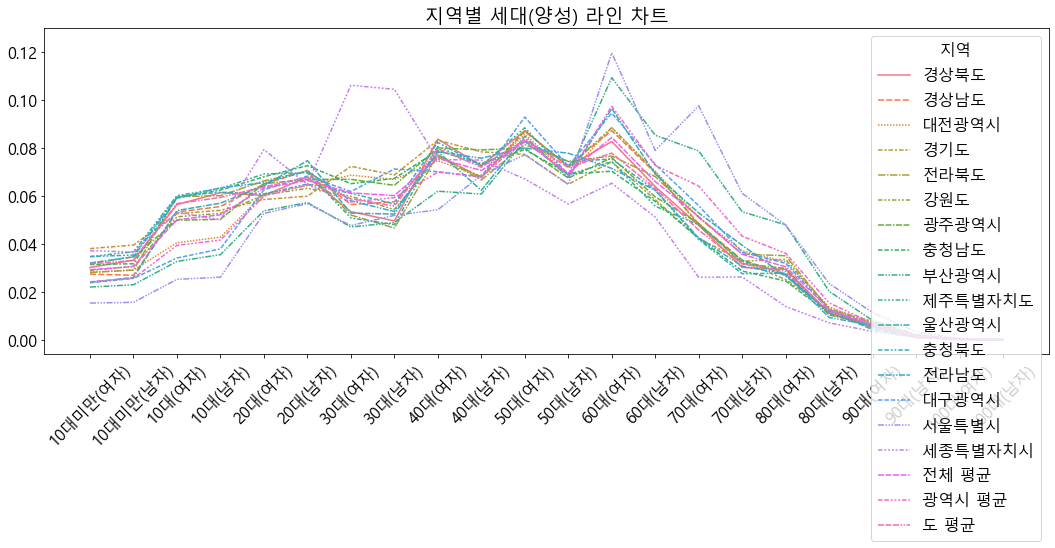

In [36]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.T, )
plt.title('지역별 세대(양성) 라인 차트')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

- 비교적 정규 분포의 모양을 띄고 있습니다.
- 같은 나이대임에도 성별에 따라 편차가 존재합니다. 대체로 남성보다는 여성이 높은 비율을 보이고 있습니다.
- 서울특별시는 60대 여성, 70대 여성에서 피크를 보이고 있습니다.
- 부산광역시 또한 서울과 비슷한 패턴을 보입니다.
- 세종특별자치시는 다른 시도와는 다르게 30대에서 매우 높은 비중을 보입니다.

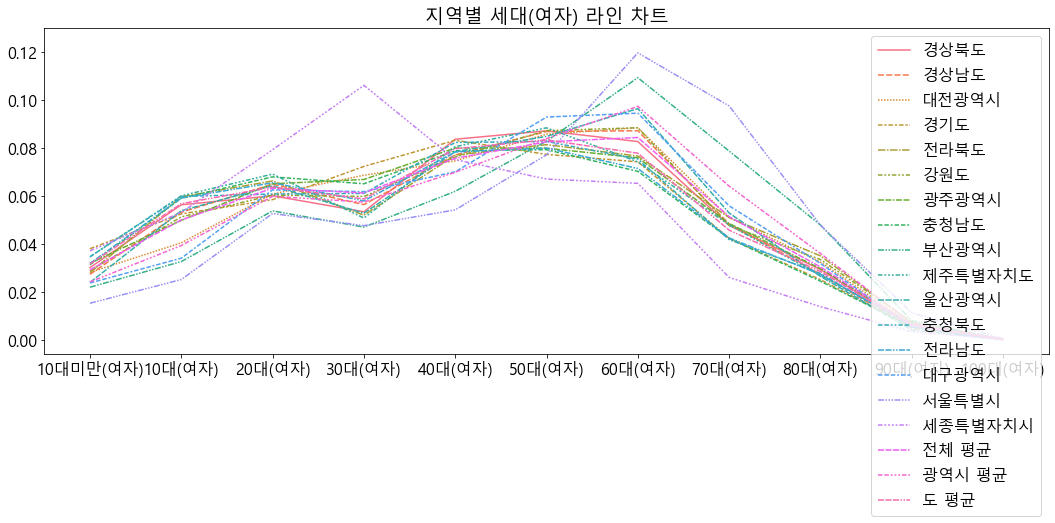

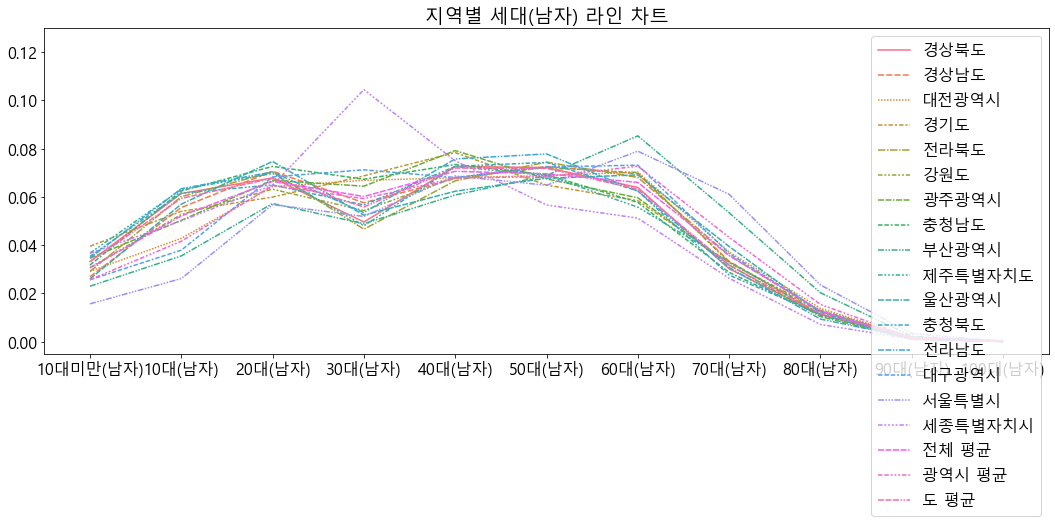

In [46]:


fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('여자')].T)
plt.title('지역별 세대(여자) 라인 차트')
plt.ylim(top=0.13)
plt.legend(loc='upper right')
plt.show()


fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.loc[:, ag.columns.str.contains('남자')].T)
plt.title('지역별 세대(남자) 라인 차트')
plt.legend(loc='upper right')
plt.ylim(top=0.13)
plt.show()

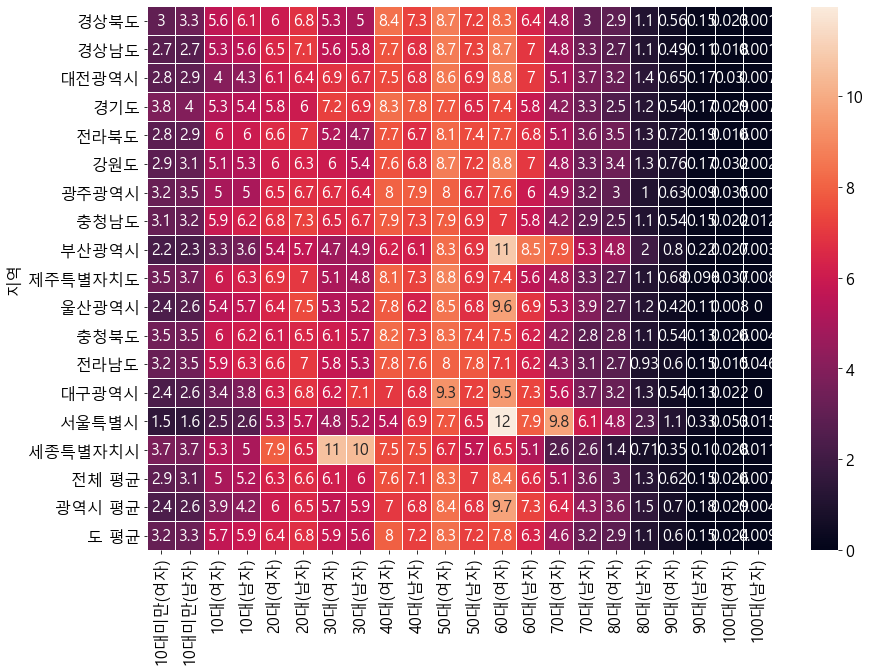

In [47]:
plt.figure(figsize=(14, 10))
sns.heatmap((ag*100).round(3),
           annot=True, linewidths=0.01,)

plt.show()

- 광역시에서 60~70대의 비중이 높은 것을 알 수 있다.
- 세종은 청년층 20~30대의 비중이 매우 높게 형성
- 광역시(세종 제외)와 도단위 지역구의 평균을 비교했을 때, 10대와 40대, 60~70대에서 차이가 두드짐

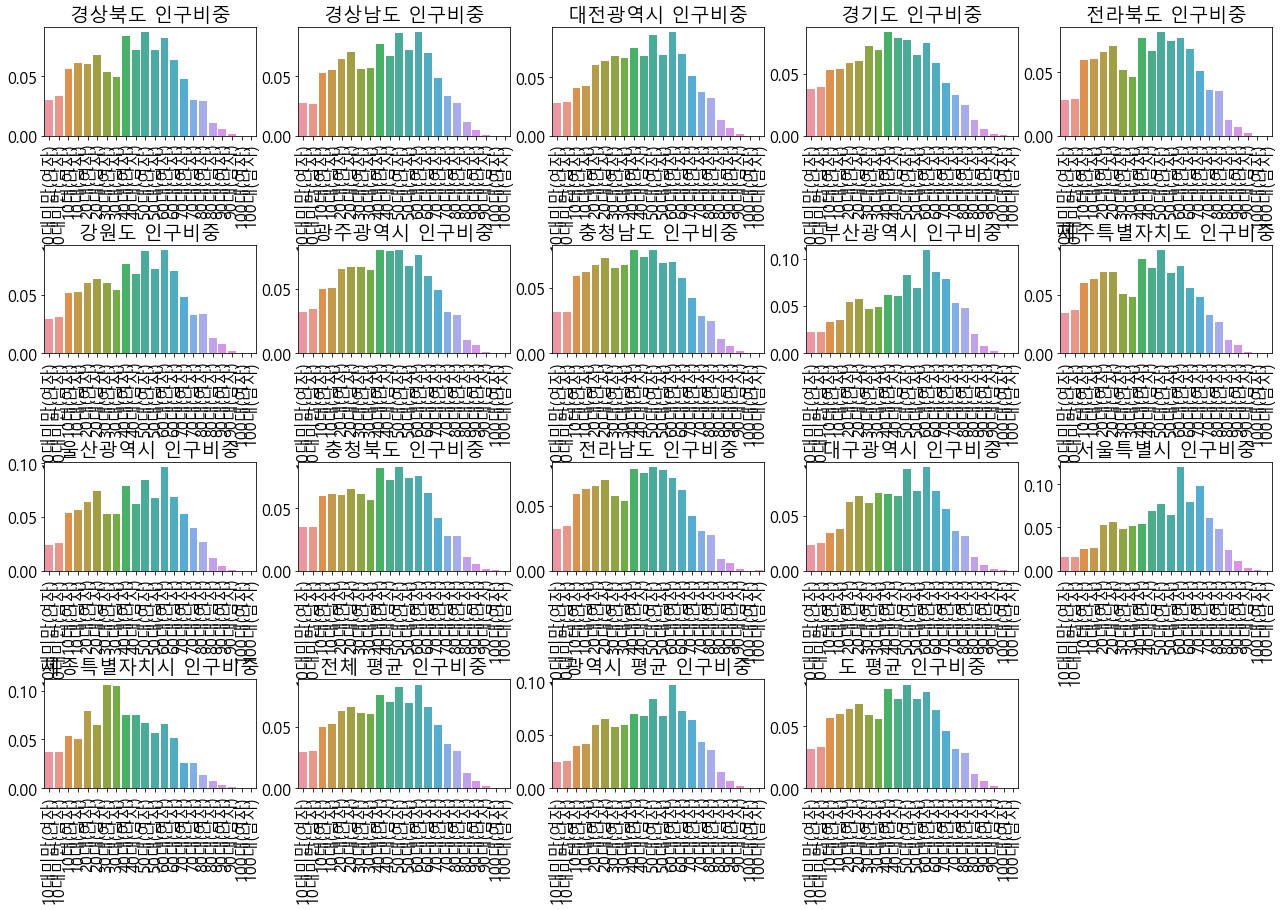

In [51]:
fig = plt.figure(figsize=(22, 18))
plt.xticks(rotation=90)
for i, n in enumerate(list(ag.index)):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=1.0)
    plt.title("{} 인구비중".format(n))
    sns.barplot(data=ag.loc[ag.index == n])
    plt.xticks(rotation=90)

#### train 데이터는3개의 테이블이 합쳐진 것으로 판단
- 아파트 + 상가 + 아파트 단지의 정보가 담긴 테이블
- 아파트 단지에 대한 정보를 아파트 유형과 상가 유형으로 나뉨

In [52]:
train_apart = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[train['임대건물구분'] == '아파트']

In [53]:
train_shop = train[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[train['임대건물구분'] == '상가']

In [54]:
train_danji = train[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수']].drop_duplicates()

In [55]:
train_apart.shape, train_shop.shape, train_danji.shape

((2347, 8), (285, 6), (423, 8))

In [56]:
# 아파트
train_apart.head(3)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
0,C2483,아파트,국민임대,39.72,134,A,15667000.0,103680.0
1,C2483,아파트,국민임대,39.72,15,A,15667000.0,103680.0
2,C2483,아파트,국민임대,51.93,385,A,27304000.0,184330.0


In [57]:
# 상가
train_shop.head(3)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형
88,C1925,상가,임대상가,32.10,1,D
91,C1925,상가,임대상가,72.16,1,D
101,C1874,상가,임대상가,12.62,1,D


In [58]:
# 단지정보
train_danji.head(3)

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,경상북도,38.0,0.0,3.0,1425.0,1015.0
8,C2515,545,경상남도,17.0,0.0,3.0,624.0,205.0
15,C1407,1216,대전광역시,13.0,1.0,1.0,1285.0,1064.0


- 아파트+상가 +단지 정보데이터를 단지코드 기준으로 join한것같음

In [59]:
test_apart = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형', '임대보증금', '임대료']].loc[test['임대건물구분'] == '아파트']

In [60]:
test_shop = test[['단지코드', '임대건물구분', '공급유형', '전용면적', '전용면적별세대수', '자격유형']].loc[test['임대건물구분'] == '상가']

In [61]:
test_danji = test[['단지코드', '총세대수', '지역', '공가수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수']].drop_duplicates()

In [62]:
test_apart.shape, test_shop.shape, test_danji.shape

((837, 8), (112, 6), (150, 7))

In [63]:
test_apart.head(3)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형,임대보증금,임대료
0,C1072,아파트,국민임대,39.79,116,H,22830000.0,189840.0
1,C1072,아파트,국민임대,46.81,30,A,36048000.0,249930.0
2,C1072,아파트,국민임대,46.90,112,H,36048000.0,249930.0


In [64]:
test_shop.head(3)

,단지코드,임대건물구분,공급유형,전용면적,전용면적별세대수,자격유형
80,C1006,상가,임대상가,38.00,1,D
82,C1006,상가,임대상가,37.26,1,D
83,C1006,상가,임대상가,37.41,1,D


In [65]:
test_danji.head(3)

,단지코드,총세대수,지역,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,경기도,14.0,0.0,2.0,683.0
8,C1128,1354,경기도,9.0,0.0,3.0,1216.0
17,C1456,619,부산광역시,18.0,0.0,16.0,547.0


## NA of 임대료

In [66]:
train.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,0
임대보증금,304


In [67]:
test.isnull().sum().to_frame()

,0
단지코드,0
총세대수,0
임대건물구분,0
지역,0
공급유형,0
전용면적,0
전용면적별세대수,0
공가수,0
자격유형,2
임대보증금,120


In [75]:
train.loc[(train['임대건물구분'] != '상가') & (train['임대보증금'].isnull())]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2331,C1350,1401,아파트,대전광역시,공공분양,74.94,317,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2332,C1350,1401,아파트,대전광역시,공공분양,74.94,137,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2337,C1350,1401,아파트,대전광역시,공공분양,84.97,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,NaN,NaN,0.0,4.0,1670.0,1153.0


In [95]:
train.loc[(train['임대건물구분'] == '상가') & (train['자격유형'] !='D')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수


In [96]:
test.loc[(test['임대건물구분'] == '상가') & (test['자격유형'] !='D')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수


- !!!!!!!!!!!!!D형은 상가에만 있는 유형임. 의심해봐야한다!!!!!!!!!

In [76]:
train[train.임대건물구분=='상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,C2212,697,상가,강원도,임대상가,31.84,1,0.0,D,NaN,NaN,0.0,4.0,128.0,86.0
817,C2212,697,상가,강원도,임대상가,63.68,1,0.0,D,NaN,NaN,0.0,4.0,128.0,86.0
821,C2212,697,상가,강원도,임대상가,137.49,1,0.0,D,NaN,NaN,0.0,4.0,128.0,86.0
826,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,NaN,NaN,0.0,1.0,65.0,62.0


In [78]:
a=test.loc[(test['임대건물구분'] != '상가') & (train['임대보증금'].isnull())]

In [82]:
a['자격유형'].value_counts()

A    207
C      8
H      5
E      2
I      2
Name: 자격유형, dtype: int64

In [88]:
a= test.loc[(test['자격유형']== 'D')]

In [93]:
test.loc[(test['임대건물구분'] == '아파트') & (test['자격유형']== 'D')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
76,C1006,1505,아파트,대전광역시,영구임대,26.37,10,27.0,D,NaN,NaN,2.0,5.0,428.0
79,C1006,1505,아파트,대전광역시,영구임대,52.74,6,27.0,D,NaN,NaN,2.0,5.0,428.0


## NA of 지하철

In [68]:
train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()].sample(5)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000.0,122210.0,NaN,3.0,527.0,359.0
781,C1004,521,상가,충청남도,임대상가,50.08,1,3.0,D,NaN,NaN,NaN,2.0,153.0,93.0
217,C2258,965,아파트,대전광역시,영구임대,40.32,180,13.0,C,8848000.0,122290.0,NaN,3.0,287.0,78.0
107,C1874,619,상가,충청남도,임대상가,23.25,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
108,C1874,619,상가,충청남도,임대상가,27.75,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0


In [69]:
print('전체 단지 수: ', train['단지코드'].nunique())
print('지하철 결측치 단지 수: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', train.loc[train['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  423
지하철 결측치 단지 수:  20
지하철 결측치 단지:  ['C1312' 'C1874' 'C1424' 'C2100' 'C2520' 'C1616' 'C1704' 'C2258' 'C1068'
 'C1983' 'C2216' 'C2644' 'C1005' 'C1004' 'C1875' 'C2156' 'C1175' 'C2583'
 'C1649' 'C1350']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시' '경상남도']


- ['충청남도' '대전광역시' '경상남도']에 지하철 있음

In [71]:
print('전체 단지 수: ', test['단지코드'].nunique())
print('지하철 결측치 단지 수: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].nunique())
print('지하철 결측치 단지: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['단지코드'].unique())
print('지하철 결측치 단지 지역: ', test.loc[test['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]['지역'].unique())

전체 단지 수:  150
지하철 결측치 단지 수:  5
지하철 결측치 단지:  ['C1472' 'C1083' 'C2177' 'C1318' 'C1327']
지하철 결측치 단지 지역:  ['충청남도' '대전광역시']


In [72]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000.0,456000.0,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000.0,462000.0,NaN,NaN,1066.0,855.0


In [73]:
train.loc[train['도보 10분거리 내 버스정류장 수'].isnull()]['지역'].unique()

array(['경상남도'], dtype=object)

In [74]:
test.loc[test['도보 10분거리 내 버스정류장 수'].isnull()]['지역'].unique()

array([], dtype=object)

- 경상남도 C1649 단지에만 결측값 존재

## apps 전처리를 위한 train, test 결합

In [ ]:
# pandas의 concat()을 이용하여 app_train과 app_test를 결합
apps = pd.concat([train_agg,test_agg])
apps.shape

## 결측치 확인

In [ ]:
apps.isna().sum()

In [ ]:
apps.info()

In [ ]:
# apps['지역'].value_counts()

In [ ]:
# apps['임대건물구분'].value_counts()

In [ ]:
# apps['공급유형'].value_counts()

In [ ]:
# apps['단지내주차면수'].value_counts()

In [ ]:
# apps['도보 10분거리 내 버스정류장 수'].value_counts()

In [ ]:
# apps['자격유형'].value_counts()

## 컬럼명 변경

지하쳘역 수와 버스 정류장 수의 컬럼명을 지하철, 버스로 변경하였습니다.

In [ ]:
apps.columns

In [ ]:
apps.columns = [
     '총세대수', '지역', '공가수', 
               '지하철',
               '버스',
               '단지내주차면수', '등록차량수
]

In [ ]:
# apps['단지코드'].describe()

### 임대료의 '-'값 Nan값으로 처리

In [ ]:
apps['임대료'].value_counts()

In [ ]:
apps['임대료'] = apps['임대료'].replace('-', np.NaN)

In [ ]:
# 위와 동일한 결과를 볼 수 있다.
#train['임대료'].replace('-', 'nan',inplace = True )

In [ ]:
apps['임대료'].value_counts()

In [ ]:
apps['임대보증금'].value_counts()

In [ ]:
print(apps[apps['임대보증금'] == '-']['임대보증금'].count())

In [ ]:
apps['임대보증금'].isnull().sum()

In [ ]:
apps['임대보증금'] = apps['임대보증금'].replace('-', np.NaN)

In [ ]:
apps['임대보증금'].isnull().sum()

#### object 타입을 float 로 바꿔준다.

In [ ]:
apps['임대료']=apps['임대료'].astype('float')

In [ ]:
apps['임대보증금']=apps['임대보증금'].astype('float')

## 전용면적을 5의 배수로 변경

In [ ]:
apps['전용면적'].describe()

In [ ]:
# apps['전용면적'].unique()

In [ ]:
apps['전용면적'] = apps['전용면적']//5*5

### age_gender_info

In [ ]:
ag = age_gender.set_index('지역')
ag

In [ ]:
ag.loc['전체 평균'] = ag.mean()
ag.loc['광역시 평균'] = ag.loc[(ag.index.str.contains('시')) & (~ag.index.str.contains('세종'))].mean()
ag.loc['도 평균'] = ag.loc[ag.index.str.contains('도')].mean()

In [ ]:
fig = plt.figure(figsize = (18, 6))
sns.lineplot(data=ag.T, )
plt.title('지역별 세대(양성) 라인 차트')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

## 전용면적 상/하한 적용

상한100, 하한 15

In [ ]:
# apps['전용면적']

In [ ]:
apps['전용면적'].hist()

In [ ]:
sns.boxplot(apps['전용면적'])

In [ ]:
apps['전용면적'].describe()

- max        580
- min         5

In [ ]:
a=apps.loc[apps['전용면적'] >= 100]
a['전용면적'].count()

In [ ]:
a=apps.loc[apps['전용면적'] >= 200]
a['전용면적'].count()

In [ ]:
a=apps.loc[apps['전용면적'] >= 400]
a['전용면적'].count()

In [ ]:
a=apps.loc[apps['전용면적'] <= 15]
a['전용면적'].count()

In [ ]:
a=apps.loc[apps['전용면적'] <= 10]
a['전용면적'].count()

In [ ]:
apps.drop(apps.loc[apps['전용면적']>= 100].index, inplace=True)

In [ ]:
sns.boxplot(apps['전용면적'])

In [ ]:
idx = apps[apps['전용면적']< 10].index
apps.loc[idx, '전용면적'] = 10

In [ ]:
sns.boxplot(apps['전용면적'])

In [ ]:
apps['전용면적'].describe()

In [ ]:
apps['전용면적'].unique()

#### 단지내주차면수 (전처리 필요할지..?)

In [ ]:
apps['단지내주차면수'].describe()

In [ ]:
sns.boxplot(apps['단지내주차면수'])

1700이상 값들이 이상치로 보여서 

In [ ]:
a=apps.loc[apps['단지내주차면수'] >= 1700]

In [ ]:
a['단지내주차면수'].value_counts()

In [ ]:
a['단지내주차면수'].mean()

#### 이상치들의 평균값으로 대체

In [ ]:
idx = apps[apps['단지내주차면수'] >= 1700].index
apps.loc[idx, '단지내주차면수'] = 1755

In [ ]:
sns.boxplot(apps['단지내주차면수'])

## label_encoder

In [ ]:
# from sklearn import preprocessing
# label_encoder=preprocessing.LabelEncoder()

In [ ]:
# Label 인코딩을 위해 object 유형의 컬럼만 추출 
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

In [ ]:
object_columns.remove('단지코드')

In [ ]:
object_columns

In [ ]:
# pd.factorize()는 한개의 컬럼만 Label 인코딩이 가능하므로 object형 컬럼들을 iteration하면서 변환 수행. 
for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [ ]:
apps.info()

- 총 53개

## Null값 추가처리 필요

## 등록차량수 Null값을 기준으로 train, test분리

In [ ]:
# -999로 모든 컬럼들의 Null값 변환
apps['등록차량수'] = apps['등록차량수'].fillna(-999)

In [ ]:
# app_test의 TARGET 컬럼은 원래 null이었는데 앞에서 fillna(-999)로 -999로 변환됨. 이를 추출함. 
app_train = apps[apps['등록차량수'] != -999]
app_test = apps[apps['등록차량수']== -999]
app_train.shape, app_test.shape

In [ ]:
# app_test의 TARGET컬럼을 Drop
app_test = app_test.drop('등록차량수', axis=1)

In [ ]:
app_train.shape, app_test.shape

### 상관관계

In [ ]:
corr_columns = ['총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수']


corr = app_train[corr_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.savefig('전용면적100이상drop.png')

## 단지별 데이터 1차원으로 취합

In [ ]:
columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스','단지내주차면수']
target = '등록차량수'
area_columns = []
for area in app_train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [ ]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [ ]:
for i, code in tqdm(enumerate(app_train['단지코드'].unique())):
    temp = app_train[app_train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(app_test['단지코드'].unique())):
    temp = app_test[app_test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

In [ ]:
new_train

In [ ]:
new_train.info()

In [ ]:
new_test.info()

## 결측치 처리

In [ ]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

In [ ]:
new_train

## 기본모델 사용

In [ ]:
X = new_train.iloc[:, 1:-1]
y= new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [ ]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

In [ ]:
# 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# 이전에 만든 예제들이 X, y로 사용하고 있기 때문에 변수에 담아준다.
X = X_train
y = y_train

In [ ]:
params = {
    # 이웃의 개수
    'n_neighbors' : list(range(1, 11))
}

model1 = KNeighborsRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
grid_clf1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')

In [ ]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=kfold)
grid_clf2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

In [ ]:
# Ridge
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = Ridge()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=kfold)
grid_clf3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')

In [ ]:
# Lasso
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model4 = Lasso()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=kfold)
grid_clf4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')

In [ ]:
# ElasticNet
# alpha : 값이 작을 수록 규제가 약해지고 값이 클수록 규제가 강해진다.
params = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model5 = ElasticNet()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='r2', cv=kfold)
grid_clf5.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf5.best_score_}')

In [ ]:
# SVM(SVR)
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model6 = SVR()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='r2', cv=kfold)
grid_clf6.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf6.best_score_}')

In [ ]:
# max_depth : 최대 질문 생성 깊이
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = DecisionTreeRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='r2', cv=kfold)
grid_clf7.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf7.best_score_}')

In [ ]:
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='r2', cv=kfold)
grid_clf8.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf8.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
}

model9 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='r2', cv=kfold)
grid_clf9.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf9.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model10 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf10 = GridSearchCV(model10, param_grid=params, scoring='r2', cv=kfold)
grid_clf10.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf10.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf10.best_score_}')

In [ ]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model11 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf11 = GridSearchCV(model11, param_grid=params, scoring='r2', cv=kfold)
grid_clf11.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf11.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf11.best_score_}')

In [ ]:
# booster : 사용할 알고리즘 종류
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model12 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf12 = GridSearchCV(model12, param_grid=params, scoring='r2', cv=kfold)
grid_clf12.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid_clf12.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf12.best_score_}')

In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    grid_clf10.best_score_,grid_clf11.best_score_, grid_clf12.best_score_,    
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost','GradientBoost','LGBM','XGBoost'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

## voting

In [ ]:
# # SVC 에서 확률을 확인할 수 있도록 설정한다.
# grid_clf3.best_estimator_.probability = True

# model_list = (
#     ('model1', grid_clf1.best_estimator_), 
#     ('model2', grid_clf2.best_estimator_),
#     ('model3', grid_clf3.best_estimator_),
#     ('model4', grid_clf4.best_estimator_),
#     ('model5', grid_clf5.best_estimator_),
#     ('model6', grid_clf6.best_estimator_),
#     ('model7', grid_clf7.best_estimator_),
#     ('model8', grid_clf8.best_estimator_),
#     ('model9', grid_clf9.best_estimator_),
#      ('model10', grid_clf10.best_estimator_),
#     ('model11', grid_clf11.best_estimator_),
#     ('model12', grid_clf12.best_estimator_)
# )

# model13= VotingRegressor(estimators=model_list,voting='hard')
# model14=VotingRegressor(estimators=model_list,voting='soft')

In [ ]:
# 최적의 모델을 생성한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = LinearRegression()
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_
best_model5 = grid_clf5.best_estimator_
best_model6 = grid_clf6.best_estimator_
best_model7 = grid_clf7.best_estimator_
best_model8 = grid_clf8.best_estimator_
best_model9 = grid_clf9.best_estimator_
best_model10 = grid_clf10.best_estimator_
best_model11 = grid_clf11.best_estimator_
best_model12 = grid_clf12.best_estimator_

# 사용할 알고리즘들..
model_list = [
    ('model1', best_model1), ('model2', best_model2), ('model3', best_model3),
    ('model4', best_model4), ('model5', best_model5), ('model6', best_model6),
    ('model7', best_model7), ('model8', best_model8), ('model9', best_model9),
    ('model10', best_model10), ('model11', best_model11),
    ('model12', best_model12)
]

best_model13 = VotingRegressor(estimators=model_list)

In [ ]:
# 교차 검증을 수행한다.
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(best_model1, X, y, scoring='r2', cv=kfold)
r2 = cross_val_score(best_model2, X, y, scoring='r2', cv=kfold)
r3 = cross_val_score(best_model3, X, y, scoring='r2', cv=kfold)
r4 = cross_val_score(best_model4, X, y, scoring='r2', cv=kfold)
r5 = cross_val_score(best_model5, X, y, scoring='r2', cv=kfold)
r6 = cross_val_score(best_model6, X, y, scoring='r2', cv=kfold)
r7 = cross_val_score(best_model7, X, y, scoring='r2', cv=kfold)
r8 = cross_val_score(best_model8, X, y, scoring='r2', cv=kfold)
r9 = cross_val_score(best_model9, X, y, scoring='r2', cv=kfold)
r10 = cross_val_score(best_model10, X, y, scoring='r2', cv=kfold)
r11 = cross_val_score(best_model11, X, y, scoring='r2', cv=kfold)
r12 = cross_val_score(best_model12, X, y, scoring='r2', cv=kfold)
r13 = cross_val_score(best_model13, X, y, scoring='r2', cv=kfold)


In [ ]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    best_model1, best_model2, best_model3, best_model4, best_model5, best_model6,
    best_model7, best_model8, best_model9, best_model10, best_model11, best_model12, best_model13
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [ ]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    r1.mean(), r2.mean(), r3.mean(),
    r4.mean(), r5.mean(), r6.mean(),
   r7.mean(), r8.mean(), r9.mean(),
    r10.mean(), r11.mean(),r12.mean(),r13.mean(),
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LinearRegression', 'LogisticRegression', 'Ridge','Lasso','ElasticNet' , 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
                'XGBoost','Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

In [ ]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

In [ ]:
# print(r1.mean())
# print(r2.mean())
# print(r3.mean())
# print(r4.mean())
# print(r5.mean())
# print(r6.mean())
# print(r7.mean())
# print(r8.mean())
# print(r9.mean())
# print(r10.mean())
# print(r11.mean())
# print(r12.mean())
# print(r13.mean())

### 학습 데이터를 이용해 평가를 실시한다.

In [ ]:
# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)
best_model5.fit(X, y)
best_model6.fit(X, y)
best_model7.fit(X, y)
best_model8.fit(X, y)
best_model9.fit(X, y)
best_model10.fit(X, y)
best_model11.fit(X, y)
best_model12.fit(X, y)
best_model13.fit(X, y)

In [ ]:
# 학습 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)
y_pred5 = best_model5.predict(X)
y_pred6 = best_model6.predict(X)
y_pred7 = best_model7.predict(X)
y_pred8 = best_model8.predict(X)
y_pred9 = best_model9.predict(X)
y_pred10 = best_model10.predict(X)
y_pred11 = best_model11.predict(X)
y_pred12 = best_model12.predict(X)
y_pred13 = best_model13.predict(X)

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y.reset_index(drop=True, inplace=True)

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

In [ ]:
plt.plot(y, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
best_model13

### 최종평가
- 학습하지 않은 데이터를 통한 평가

In [ ]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(x_test)
x_test = scaler1.transform(x_test)
x_test

In [ ]:
# 학습하지 않은 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(x_test)
y_pred2 = best_model2.predict(x_test)
y_pred3 = best_model3.predict(x_test)
y_pred4 = best_model4.predict(x_test)
y_pred5 = best_model5.predict(x_test)
y_pred6 = best_model6.predict(x_test)
y_pred7 = best_model7.predict(x_test)
y_pred8 = best_model8.predict(x_test)
y_pred9 = best_model9.predict(x_test)
y_pred10 = best_model10.predict(x_test)
y_pred11 = best_model11.predict(x_test)
y_pred12 = best_model12.predict(x_test)
y_pred13 = best_model13.predict(x_test)

In [ ]:
# 그래프를 그리기 위해 y 값 인덱스를 다시 설정한다.
y_test.reset_index(drop=True, inplace=True)

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('KNN')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('LinearRegression')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('Ridge')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('Lasso')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred5, label='prediction')
plt.legend()
plt.title('ElasticNet')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred6, label='prediction')
plt.legend()
plt.title('SVR')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred7, label='prediction')
plt.legend()
plt.title('DecisionTreeRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred8, label='prediction')
plt.legend()
plt.title('RandomForestRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred9, label='prediction')
plt.legend()
plt.title('AdaBoostRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred10, label='prediction')
plt.legend()
plt.title('GradientBoostingRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred11, label='prediction')
plt.legend()
plt.title('LGBMRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred12, label='prediction')
plt.legend()
plt.title('XGBRegressor')
plt.show()

In [ ]:
plt.plot(y_test, label='original')
plt.plot(y_pred13, label='prediction')
plt.legend()
plt.title('VotingRegressor')
plt.show()

In [ ]:
# # 최적의 하이퍼파라미터가 셋팅된 모델을 받아온다.
# best_model = grid_clf.best_estimator_

# # 학습
# best_model.fit(X, y)



In [ ]:
# model1.fit(x_train, y_train)### 모델 하이퍼 파라미터 튜닝

## 추론 및 제출

In [ ]:
pred = best_model12.predict(x_test)

In [ ]:
# x_test['예측']=pred

In [ ]:
submission['num'] = pred

In [ ]:
submission['num']

In [ ]:
submission.to_csv(' best_XGBRegressor.csv', index=False)